# Exercise 8 Reinforcement Learning I 
## Céline Budding && Dorothea Müller 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Good vs. bad Döner

In [2]:
n_states = 50
good_doener_val = 1000
bad_doener_val = 100

rewards = np.repeat(-10, n_states + 2)
rewards[0] = 0
rewards[1] = good_doener_val
rewards[-2] = bad_doener_val
rewards[-1] = 0
rewards

array([   0, 1000,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,
        -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,
        -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,
        -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,  -10,
        -10,  -10,  -10,  -10,  -10,  -10,  100,    0])

In [3]:
# For each state, two actions are possible.
# First q values note down-movement.
q_val = np.random.random((n_states + 2, 2))
q_val[0] = np.array([0, 0])
q_val[-1] = np.array([0, 0])

q_val

array([[0.        , 0.        ],
       [0.61036122, 0.11392286],
       [0.72661896, 0.94506334],
       [0.0837502 , 0.83376208],
       [0.8950376 , 0.63880257],
       [0.25629684, 0.33952231],
       [0.81750296, 0.75790937],
       [0.93345429, 0.55312059],
       [0.06682328, 0.49640365],
       [0.99819236, 0.3493841 ],
       [0.067167  , 0.30347483],
       [0.87384285, 0.94733906],
       [0.84044595, 0.22518204],
       [0.91161422, 0.05432021],
       [0.31582412, 0.17777264],
       [0.70084985, 0.41876673],
       [0.6933435 , 0.28626162],
       [0.99773407, 0.51926842],
       [0.44356089, 0.03626935],
       [0.84273918, 0.33688006],
       [0.25203409, 0.56681887],
       [0.26193843, 0.87410367],
       [0.89114498, 0.32488102],
       [0.49436104, 0.09753114],
       [0.35141975, 0.16247092],
       [0.41566477, 0.45492853],
       [0.19592878, 0.20042707],
       [0.52419351, 0.75642151],
       [0.98297822, 0.03761192],
       [0.98682236, 0.39329748],
       [0.

In [4]:
def choose_action(q, state, eps=0.1):
    """Return -1 for down, +1 for up."""
    action = None
   
    if np.random.random() < 1-eps:
        if q[state][0] > q[state][1]:
            action = -1
        else:
            action = 1
    else:
        action = np.random.choice([1, -1])
    return action

In [5]:
# SARSA algorithm.
episodes = 500
eta = 0.1
gamma = 1
trials_taken = []

for _ in range(episodes):
    state = np.random.randint(n_states)
    action = choose_action(q_val, state)
    i = 0
    
    while(state + action > 0 and state + action < q_val.shape[0]):
        
        new_state = state + action
        reward = rewards[new_state]

        new_action = choose_action(q_val, new_state)

        # Q-val-update
        action_idx = (action+1)//2
        new_action_idx = (new_action+1)//2
        
#         print(f"{state} {action_idx}")
#         print("old:", q_val[state][action_idx])
        q_val[state][action_idx] = q_val[state][action_idx] + eta * (reward + gamma * q_val[new_state][new_action_idx] - q_val[state][action_idx])
#         print("new: ", q_val[state][action_idx])
        
        
        action = new_action
        state = new_state
        
        i+=1
    
    print("Top", q_val[1])
    print("Bot", q_val[-2])
    
#     print("STOPPED", state + action)

#     q_val[0][0] = 0
#     q_val[0][1] = 0
#     q_val[-1][0] = 0
#     q_val[-1][1] = 0
    
    trials_taken.append(i)

Top [0.61036122 0.11392286]
Bot [0.92755759 0.25832805]
Top [0.61036122 0.11392286]
Bot [126.92733974   0.23249525]
Top [0.61036122 0.11392286]
Bot [176.73044919   0.20924572]
Top [0.61036122 0.11392286]
Bot [176.73044919   0.20924572]
Top [0.61036122 0.11392286]
Bot [3.35083180e+02 1.88321149e-01]
Top [0.61036122 0.11392286]
Bot [3.35083180e+02 1.88321149e-01]
Top [0.61036122 0.11392286]
Bot [3.35083180e+02 1.88321149e-01]
Top [0.61036122 0.11392286]
Bot [3.35083180e+02 1.88321149e-01]
Top [0.61036122 0.11392286]
Bot [4.08631227e+02 1.69489034e-01]
Top [0.61036122 0.11392286]
Bot [584.9639668   79.12913934]
Top [0.61036122 0.11392286]
Bot [584.9639668   79.12913934]
Top [0.61036122 0.11392286]
Bot [1545.7218583   918.12711091]
Top [0.61036122 0.11392286]
Bot [1545.7218583   918.12711091]
Top [0.61036122 0.11392286]
Bot [1731.91232401  954.90418703]
Top [0.61036122 0.11392286]
Bot [2988.69972813 2200.18186097]
Top [0.61036122 0.11392286]
Bot [2988.69972813 2200.18186097]
Top [0.6103612

Top [6.10361219e-01 1.58812049e+04]
Bot [25433.76725362 22418.72421274]
Top [6.10361219e-01 1.58812049e+04]
Bot [25387.35044373 20876.70958687]
Top [6.10361219e-01 1.58812049e+04]
Bot [25217.20710512 22178.6989238 ]
Top [6.10361219e-01 1.59415676e+04]
Bot [25217.20710512 22178.6989238 ]
Top [6.10361219e-01 1.59415676e+04]
Bot [26228.01435532 23130.22633724]
Top [6.10361219e-01 1.59415676e+04]
Bot [26228.01435532 23130.22633724]
Top [6.10361219e-01 1.58267188e+04]
Bot [26228.01435532 23130.22633724]
Top [6.10361219e-01 1.58267188e+04]
Bot [26008.30370896 22918.3113774 ]
Top [6.10361219e-01 1.57260287e+04]
Bot [26008.30370896 22918.3113774 ]
Top [6.10361219e-01 1.57260287e+04]
Bot [26000.97153176 22518.93243575]
Top [6.10361219e-01 1.57260287e+04]
Bot [26000.97153176 22518.93243575]
Top [6.10361219e-01 1.51946102e+04]
Bot [26000.97153176 22518.93243575]
Top [6.10361219e-01 1.51946102e+04]
Bot [27569.81127097 24455.8787134 ]
Top [6.10361219e-01 1.51946102e+04]
Bot [27197.82933347 23090.82

Top [6.10361219e-01 1.57877224e+04]
Bot [32361.01845094 28581.32628155]
Top [6.10361219e-01 1.57877224e+04]
Bot [33303.63352831 29450.16413721]
Top [6.10361219e-01 1.61419287e+04]
Bot [33303.63352831 29450.16413721]
Top [6.10361219e-01 1.61419287e+04]
Bot [32751.57992298 29018.03469599]
Top [6.10361219e-01 1.61419287e+04]
Bot [33943.07311089 30018.51808306]
Top [6.10361219e-01 1.57936499e+04]
Bot [33943.07311089 30018.51808306]
Top [6.10361219e-01 1.57936499e+04]
Bot [33184.71705605 29054.6346527 ]
Top [6.10361219e-01 1.55862623e+04]
Bot [33184.71705605 29054.6346527 ]
Top [6.10361219e-01 1.55862623e+04]
Bot [33005.30071702 27195.90610974]
Top [6.10361219e-01 1.55862623e+04]
Bot [33016.71406585 29389.85711165]
Top [6.10361219e-01 1.55862623e+04]
Bot [32700.34176401 28367.71953953]
Top [6.10361219e-01 1.54007789e+04]
Bot [32700.34176401 28367.71953953]
Top [6.10361219e-01 1.52323426e+04]
Bot [32700.34176401 28367.71953953]
Top [6.10361219e-01 1.49605639e+04]
Bot [32700.34176401 28367.71

Top [6.10361219e-01 1.88405173e+04]
Bot [27968.65420497 24427.10410312]
Top [6.10361219e-01 1.95140122e+04]
Bot [27968.65420497 24427.10410312]
Top [6.10361219e-01 1.95140122e+04]
Bot [27903.97145525 23081.65134392]
Top [6.10361219e-01 1.95140122e+04]
Bot [27924.20716867 24722.77469636]
Top [6.10361219e-01 1.91891463e+04]
Bot [27924.20716867 24722.77469636]
Top [6.10361219e-01 1.91891463e+04]
Bot [27489.47762714 23688.94653948]
Top [6.10361219e-01 1.91891463e+04]
Bot [28213.07026961 24789.03531635]
Top [6.10361219e-01 1.91891463e+04]
Bot [27976.09137743 23649.44869511]
Top [6.10361219e-01 1.86264810e+04]
Bot [27976.09137743 23649.44869511]
Top [6.10361219e-01 1.91503050e+04]
Bot [27976.09137743 23649.44869511]
Top [6.10361219e-01 1.91503050e+04]
Bot [27976.09137743 23649.44869511]
Top [6.10361219e-01 1.84060517e+04]
Bot [27976.09137743 23649.44869511]
Top [6.10361219e-01 1.84060517e+04]
Bot [27369.51486038 23491.85616257]
Top [6.10361219e-01 1.82927627e+04]
Bot [27369.51486038 23491.85

In [6]:
q_val

array([[ 0.00000000e+00,  9.32641349e+03],
       [ 6.10361219e-01,  2.06052588e+04],
       [ 1.76540971e+04,  1.80118849e+04],
       [ 1.96088008e+04,  1.71211838e+04],
       [ 1.78055193e+04,  1.48988157e+04],
       [ 1.75086550e+04,  1.13113826e+04],
       [ 1.62641156e+04,  7.56263871e+03],
       [ 1.52326794e+04,  7.60599134e+03],
       [ 1.41543284e+04,  2.62978645e+03],
       [ 1.36249660e+04,  6.92789914e+03],
       [ 1.26946438e+04,  2.00297430e+03],
       [ 1.07335276e+04,  2.32938759e+03],
       [ 9.72198832e+03,  2.51794443e+03],
       [ 8.77699990e+03,  4.33379220e+01],
       [ 7.98891035e+03,  7.55205547e+02],
       [ 6.47666185e+03,  3.43711353e+02],
       [ 4.42422932e+03,  2.56255831e+00],
       [ 2.86685909e+03,  1.61349474e+02],
       [ 1.70115002e+03, -7.60706320e+01],
       [ 6.69281713e+02, -1.01756525e+02],
       [ 1.56107227e+02, -1.08738610e+02],
       [-6.28148932e+01, -1.16034211e+02],
       [-1.13805189e+02, -1.21331828e+02],
       [-1.

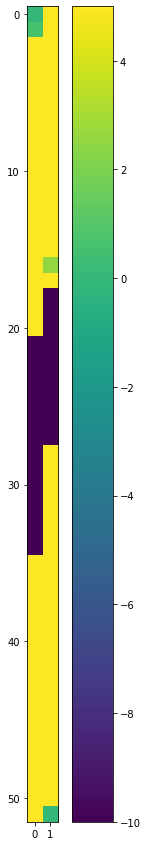

In [7]:
plt.figure(figsize = (5, 15))
plt.imshow(q_val, vmin = -10, vmax = 5)
plt.colorbar()

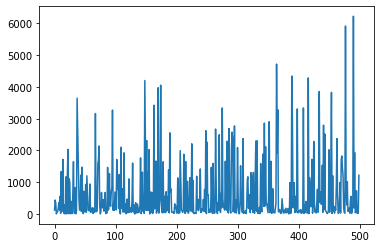

In [8]:
plt.plot(trials_taken)